## LIF(leaky-integrate-and-fire)モデルとは？

細胞膜を以下のようなRC並列回路として捉える。
![](rapture_20200119183900.jpg)

この回路によるイオンの流出過程は以下の微分方程式で計算することができる。

\begin{equation}
\tau_m {\mathrm{d} V \over \mathrm{d}t} = -V(t) + RI(t)
\end{equation}
\begin{equation}
\tau_m = RC
\end{equation}

ただし、電圧値がある時間$t$で一定値$V_{\theta}$を超えると「発火」として$V(t)=V_{max}$となり、次の時刻$t+1$では最低値$V(t+1)=V_{min}$に戻る。

今回は$\tau_m=30\mathrm{ms}, R=1\Omega, I(t)=1\mathrm{A}, V_{min}=0\mathrm{mV}, V_{max}=30\mathrm{mV}$とする。

微分方程式を解くために、ルンゲクッタ法というアルゴリズムを使用する。

$$y(t_0)=y_0$$

$$y'=f(y)$$

ここで時間$t_n$における$y_n$から時間$t_n+dt$における$y_{n+1}$を以下のように計算することができる。

$$ y_{n+1}=y_n+{(k_1+2k_2+2k_3+k_4)\over6}$$

$$ k_1=f(y_n) $$
$$ k_2=f(y_n+{dt\over2}k_1) $$
$$ k_3=f(y_n+{dt\over2}k_2) $$
$$ k_4=f(y_n+dt k_3) $$


この計算を以下の関数にまとめる。

In [1]:
def runge(dt, func, x):
    k1 = dt * func(x)
    k2 = dt * func(x + k1 / 2)
    k3 = dt * func(x + k2 / 2)
    k4 = dt * func(x + k3)
    x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return x

計算してみる。

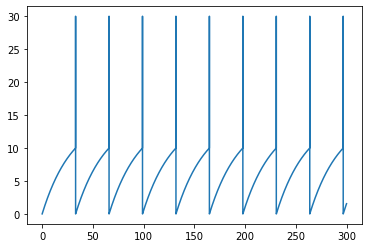

In [16]:
import numpy as np
import matplotlib.pyplot as plt

tau = 30
V0 = 0
V_min = 0
V_max = 30
dt = 0.01

def f(V):
    return (-V+15)/tau

def runge(dt, func, x):
    k1 = dt * func(x)
    k2 = dt * func(x + k1 / 2)
    k3 = dt * func(x + k2 / 2)
    k4 = dt * func(x + k3)
    x += (k1 + 2 * k2 + 2 * k3 + k4) / 6
    return x

x = np.arange(0, 300, 0.01)
y = np.array([])

V = V0

for x_ in x:
    V = runge(dt, f, V)
    if V > 20:
        V = 0
    elif V > 10:
        V = 30
    y = np.append(y, V)

plt.plot(x, y)